<a href="https://colab.research.google.com/github/avashshakya1/Moulation/blob/main/Chaos%2C_machine_learning%2C_and_aliens_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigating Markovian Assumption in Chaotic Dynamics

## Introduction

This problem explores a fundamental assertion in the context of systems exhibiting chaotic dynamics. The claim suggests that if a system undergoes sufficient randomization over a timescale $\delta t $, the Markovian assumption holds for transition probabilities between its states. In simpler terms, the probability of observing a state at $ t + \delta t $ depends solely on the state at time $ t $ and not on earlier states.

## Chaotic Dynamics Model

Consider a special case of the logistic growth model, commonly applied in ecological scenarios. Each time step represents a generation, where the population $ n_i $ at the beginning of the $ i $-th time step gives birth to offspring and experiences mortality. The growth equation, accounting for a carrying capacity $ K $ and resource limitations, is given by:

$ n_{i+1} = 4n_i \left(1 - \frac{n_i}{K}\right) $

Simplifying by introducing the variable $ x_i = \frac{n_i}{K} $, representing the fraction of the carrying capacity filled at the $ i $-th time step:

$ x_{i+1} = 4x_i (1 - x_i) $

The system's dynamics are contingent on the prefactor, here set to 4, turning the equation into a logistic map known for its chaotic behavior.

## Objective

The primary objective is to test the Markovian assumption by observing the system's behavior over time. The focus is on evaluating whether the state at $ t + \delta t $ is exclusively dependent on the state at $ t $.






## General questions:
-Generating trajectories of a discrete-time dynamical system using the logistic map.\
-Coarse-graining the trajectory into macrostates based on specified bins.\
-Calculating conditional probabilities P(y4=j|y3=1) and P(y4=j|y3=1, y2=k) to verify Markovian properties.\
-Calculating transition matrices for different time steps.\
-Using the discrete-time master equation to calculate the probability distribution of states at a future time step.\
-Comparing results obtained from the master equation and direct calculation from the ensemble.\
-Verifying that the results obtained from the master equation and the ensemble match.\

# Assignment Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Main Functions for Analysis

In [2]:
# Logistic map function
def logistic_map(x):
    return 4 * x * (1 - x)

# Function to generate a trajectory starting from a given initial value
def generate_trajectory(x0, steps):
    trajectory = [x0]
    for _ in range(steps):
        x0 = logistic_map(x0)
        trajectory.append(x0)
    return np.array(trajectory)

# Function to calculate absolute differences between two trajectories
def calculate_differences(trajectory1, trajectory2):
    return np.abs(trajectory1 - trajectory2)

# Plotting function
def plot_trajectories(trajectory1, trajectory2, differences):
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(trajectory1, label='Trajectory 1')
    plt.plot(trajectory2, label='Trajectory 2')
    plt.title('Comparison of Trajectories')
    plt.xlabel('Time Steps (dt)')
    plt.ylabel('Population (x)')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.semilogy(differences, label='Absolute Differences')
    plt.title('Absolute Differences on Log Scale (log)')
    plt.xlabel('Time Steps')
    plt.ylabel('Absolute Differences')
    plt.legend()

    plt.tight_layout()
    plt.show()
def coarse_grain_states(x):
    if 0 <= x < 0.25:
        return 1
    elif 0.25 <= x < 0.5:
        return 2
    elif 0.5 <= x < 0.75:
        return 3
    elif 0.75 <= x <= 1:
        return 4
    else:
        raise ValueError("Input x should be in the range [0, 1]")


def generate_trajectory_ensemble(num_trajectories, trajectory_length, delta_t):
    ensemble = []


    for i in range(num_trajectories):
        x0 = np.random.uniform(0, 0.25)
        trajectory = [coarse_grain_states(x0)]
        for t in range(1, trajectory_length + 1):
            x0 = logistic_map(x0)
            if t % delta_t == 0:
                macrostate = coarse_grain_states(x0)
                trajectory.append(macrostate)

        ensemble.append(trajectory)

    return ensemble

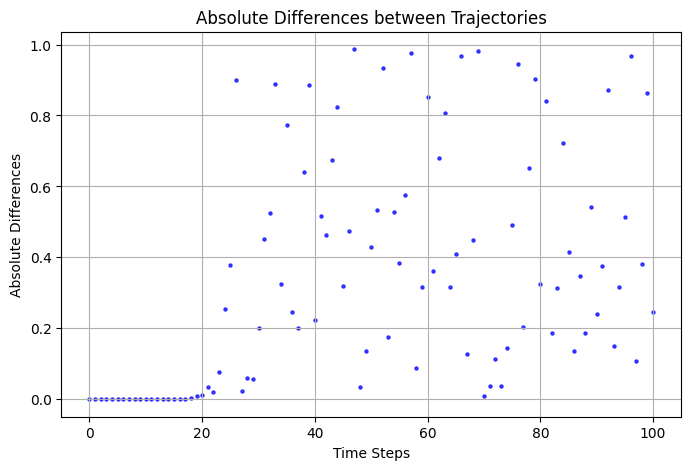

In [3]:
# Generate trajectories
x0_1 = 0.1
x0_2 = 0.1 + 10**-8
total_time_steps = 100


trajectory1 = generate_trajectory(x0_1, total_time_steps)
trajectory2 = generate_trajectory(x0_2, total_time_steps)

# Calculate differences
differences = np.abs(np.array(trajectory1) - np.array(trajectory2))

# Plotting scatter plot of differences
plt.figure(figsize=(8, 5))
plt.scatter(range(total_time_steps+1), differences, s=5, c='blue', alpha=0.7)
plt.title('Absolute Differences between Trajectories')
plt.xlabel('Time Steps')
plt.ylabel('Absolute Differences')
plt.grid(True)
plt.show()

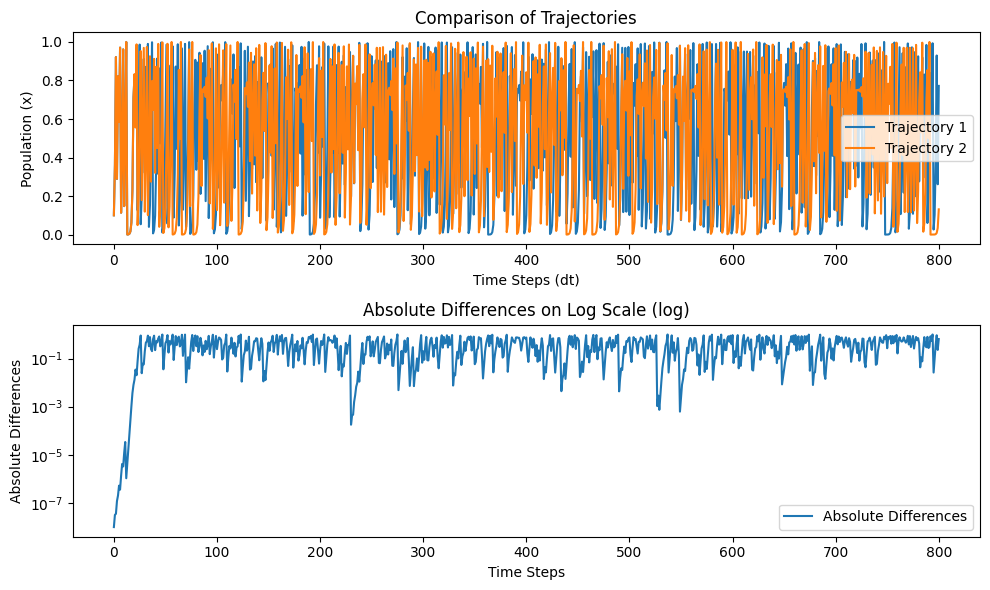

In [4]:
# Set initial conditions and number of steps
x0_1 = 0.1
x0_2 = 0.1 + 1e-8
num_steps = 800

# Generate trajectories
trajectory_1 = generate_trajectory(x0_1, num_steps)
trajectory_2 = generate_trajectory(x0_2, num_steps)

# Calculate absolute differences
differences = calculate_differences(trajectory_1, trajectory_2)

# Plot the results
plot_trajectories(trajectory_1, trajectory_2, differences)

In [5]:
# Generate trajectory ensemble
num_trajectories = 100
trajectory_length = 200
delta_t = 50
ensemble = generate_trajectory_ensemble(num_trajectories, trajectory_length, delta_t)

# Print the trajectories
for i, trajectory in enumerate(ensemble):
    print(f"Trajectory {i + 1}: {trajectory}")


Trajectory 1: [1, 1, 4, 3, 2]
Trajectory 2: [1, 4, 1, 4, 1]
Trajectory 3: [1, 1, 3, 2, 4]
Trajectory 4: [1, 4, 1, 2, 4]
Trajectory 5: [1, 2, 4, 4, 1]
Trajectory 6: [1, 1, 1, 4, 4]
Trajectory 7: [1, 1, 3, 4, 4]
Trajectory 8: [1, 2, 4, 1, 4]
Trajectory 9: [1, 1, 1, 1, 3]
Trajectory 10: [1, 4, 4, 2, 4]
Trajectory 11: [1, 4, 2, 4, 4]
Trajectory 12: [1, 2, 1, 1, 4]
Trajectory 13: [1, 2, 2, 1, 4]
Trajectory 14: [1, 3, 3, 3, 2]
Trajectory 15: [1, 3, 1, 4, 3]
Trajectory 16: [1, 4, 3, 2, 4]
Trajectory 17: [1, 2, 1, 4, 3]
Trajectory 18: [1, 4, 4, 1, 4]
Trajectory 19: [1, 4, 1, 3, 2]
Trajectory 20: [1, 1, 4, 2, 2]
Trajectory 21: [1, 4, 1, 4, 2]
Trajectory 22: [1, 1, 2, 3, 1]
Trajectory 23: [1, 4, 3, 3, 2]
Trajectory 24: [1, 1, 4, 2, 1]
Trajectory 25: [1, 3, 3, 1, 2]
Trajectory 26: [1, 1, 2, 1, 2]
Trajectory 27: [1, 2, 1, 4, 2]
Trajectory 28: [1, 1, 4, 4, 3]
Trajectory 29: [1, 2, 1, 4, 2]
Trajectory 30: [1, 1, 3, 1, 4]
Trajectory 31: [1, 2, 1, 1, 1]
Trajectory 32: [1, 4, 1, 1, 1]
Trajectory 33: [1

In [6]:
def calculate_conditionals(ensemble, j=None, k=None):
    countTotal_1 = 0
    count_1 = 0
    countTotal_2 = 0
    count_2 = 0

    for trajectory in ensemble:
        if trajectory[3] == 1:
            countTotal_1 += 1
            if j is not None and trajectory[4] == j:
                count_1 += 1

        if k is not None and trajectory[2] == k and trajectory[3] == 1:
            countTotal_2 += 1
            if j is not None and trajectory[4] == j:
                count_2 += 1

    firstConditional = count_1 / countTotal_1 if countTotal_1 != 0 else 0
    secondConditional = count_2 / countTotal_2 if countTotal_2 != 0 else 0

    return firstConditional, secondConditional

# Example usage:
ensemble = generate_trajectory_ensemble(num_trajectories=100000, trajectory_length=200, delta_t=50)
j = 1  # The value of j for conditional P(y4 = j|y3 = 1)
k = 2  # The value of k for conditional P(y4 = j|y3 = 1, y2 = k)
prob_y4_given_y3_1, prob_y4_given_y3_1_y2_k = calculate_conditionals(ensemble, j, k)
print("P(y4 = {}|y3 = 1) ≈ {:.5f}".format(j, prob_y4_given_y3_1))
print("P(y4 = {}|y3 = 1, y2 = {}) ≈ {:.5f}".format(j, k, prob_y4_given_y3_1_y2_k))


P(y4 = 1|y3 = 1) ≈ 0.33946
P(y4 = 1|y3 = 1, y2 = 2) ≈ 0.34420


In [7]:
# Example usage:
ensemble = generate_trajectory_ensemble(num_trajectories=100000, trajectory_length=4, delta_t=1)
j_values = [1, 2, 3, 4]  # Values of j to test
k_values = [1, 4]  # Values of k to test

for j in j_values:
    for k in k_values:
        prob_y4_given_y3_1, prob_y4_given_y3_1_y2_k = calculate_conditionals(ensemble, j, k)
        print("P(y4 = {}|y3 = 1, y2 = {}) ≈ {:.5f}".format(j, k, prob_y4_given_y3_1_y2_k))


P(y4 = 1|y3 = 1, y2 = 1) ≈ 0.24744
P(y4 = 1|y3 = 1, y2 = 4) ≈ 0.49970
P(y4 = 2|y3 = 1, y2 = 1) ≈ 0.31367
P(y4 = 2|y3 = 1, y2 = 4) ≈ 0.25300
P(y4 = 3|y3 = 1, y2 = 1) ≈ 0.43889
P(y4 = 3|y3 = 1, y2 = 4) ≈ 0.24730
P(y4 = 4|y3 = 1, y2 = 1) ≈ 0.00000
P(y4 = 4|y3 = 1, y2 = 4) ≈ 0.00000


In [8]:
import numpy as np

# Function to calculate the transition matrix W(t)
def calculate_transition_matrix(ensemble, t):
    transition_matrix = np.zeros((4, 4))

    for j in range(1, 5):
        for i in range(1, 5):
            count_ij = 0
            count_j = 0
            for trajectory in ensemble:
                if trajectory[t] == j:
                    count_j += 1
                    if trajectory[t + 1] == i:
                        count_ij += 1
            transition_matrix[i - 1, j - 1] = count_ij / count_j if count_j != 0 else 0

    return transition_matrix

# Example usage:
ensemble = generate_trajectory_ensemble(num_trajectories=100000, trajectory_length=200, delta_t=50)
transition_matrix_t3 = calculate_transition_matrix(ensemble, t=3)
print("Transition matrix W(t3):")
print(transition_matrix_t3)


Transition matrix W(t3):
[[0.33539441 0.33298994 0.33592861 0.33713603]
 [0.16448553 0.1697976  0.1649997  0.16547708]
 [0.1676972  0.16173797 0.16985087 0.1652083 ]
 [0.33242286 0.33547449 0.32922082 0.33217859]]


In [9]:
# Function to calculate the state probability vector at time t4 using the master equation
def calculate_state_probability(ensemble, t0_matrix, t3_matrix):
    p_t0 = np.array([1, 0, 0, 0])  # Initial state probability vector
    p_tn = np.copy(p_t0)

    # Iterate the transition matrices from t0 to t3
    for t_matrix in [t0_matrix, t3_matrix]:
        p_tn = np.dot(t_matrix, p_tn)

    return p_tn

# Function to calculate the state probability vector directly from the ensemble at time t4
def calculate_state_probability_directly(ensemble):
    total_trajectories = len(ensemble)
    state_counts = np.zeros(4)

    # Count the occurrences of each state at time t4 in the ensemble
    for trajectory in ensemble:
        state_counts[trajectory[-1] - 1] += 1

    # Calculate the state probabilities
    p_t4 = state_counts / total_trajectories

    return p_t4

# Example usage:
ensemble = generate_trajectory_ensemble(num_trajectories=100000, trajectory_length=200, delta_t=50)
t0_matrix = calculate_transition_matrix(ensemble, t=0)  # Transition matrix W(t0)
t3_matrix = calculate_transition_matrix(ensemble, t=3)  # Transition matrix W(t3)

# Calculate p(t4) using the master equation
p_t4_master_eq = calculate_state_probability(ensemble, t0_matrix, t3_matrix)

# Calculate p(t4) directly from the ensemble
p_t4_direct = calculate_state_probability_directly(ensemble)

print("State probability vector p(t4) using the master equation:")
print(p_t4_master_eq)
print("State probability vector p(t4) directly from the ensemble:")
print(p_t4_direct)


State probability vector p(t4) using the master equation:
[0.33347802 0.16629277 0.16605537 0.33417385]
State probability vector p(t4) directly from the ensemble:
[0.33347 0.16631 0.16605 0.33417]


In [10]:

# Generate the ensemble of trajectories
ensemble = generate_trajectory_ensemble(num_trajectories=100000, trajectory_length=200, delta_t=50)

# Calculate the transition matrices for all time steps
transition_matrix_t0 = calculate_transition_matrix(ensemble, t=0)
transition_matrix_t1 = calculate_transition_matrix(ensemble, t=1)
transition_matrix_t2 = calculate_transition_matrix(ensemble, t=2)

# Calculate p(t0)
p_t0 = np.array([1, 0, 0, 0])

# Calculate p(t1)
p_t1 = np.dot(transition_matrix_t0, p_t0)

# Calculate p(t2)
p_t2 = np.dot(transition_matrix_t1, p_t1)

# Check the results
print("p(t0) =", p_t0)
print("p(t1) =", p_t1)
print("p(t2) =", p_t2)


p(t0) = [1 0 0 0]
p(t1) = [0.33309 0.16821 0.16701 0.33169]
p(t2) = [0.33233 0.16827 0.16637 0.33303]


**Bayesian Framework**

Probability for a single labeled data point $(x^{(n)}, l_n)$ is defined by the network output $p_1(x^{(n)}; w)$ as:
$
P((x^{(n)}, l_n)|w) =
\begin{cases}
p_1(x^{(n)}; w) & \text{if } l_n = 1 \\
1 - p_1(x^{(n)}; w) & \text{if } l_n = 2
\end{cases}
$

Probability assigned to the whole dataset $D$ by the network:
$
P(D|w) = \prod_{n=1}^{N} P((x^{(n)}, l_n)|w)
$

Prior assumption about network parameters:
$
P(w) = \frac{1}{(2\pi s^2)^{3/2}} \exp\left(-\frac{w^2}{2s^2}\right)
$
where $s$ is a regularization parameter.

**Posterior Distribution:**
 Using Bayes’s theorem, the posterior distribution $P(w|D)$ is given by:
$
P(w|D) = \frac{P(D|w)P(w)}{P(D)}
$
The goal is to find a set of network parameters $w$ that maximizes $P(w|D)$.

loss function:
$ L(w|D) = \frac{w^2}{2s^2} + \frac{3}{2} \ln\left(2\pi s^2\right) - \sum_{n=1}^{N} \left(\ln\left(P(x^n,l_n)|w)\right)\right) + \ln(P(D)) $



In [11]:
import numpy as np

# Define the sigmoid function
def sigmoid(y):
    return 0.5 * (1 + np.tanh(y))

# Define the log likelihood function
def log_likelihood(x, l, w):
    p1 = sigmoid(np.dot(x, w[:2]) + w[2])
    return np.log(p1) if l == 1 else np.log(1 - p1)

# Define the loss function L(w|D)
def loss_function(data, w, s=1):
    total_log_likelihood = sum(log_likelihood(x[:2], x[2], w) for x in data)
    regularization_term = (3/2) * np.log(2 * np.pi * s**2) + np.dot(w, w) / (2 * s**2)
    return -total_log_likelihood + regularization_term


# Load the data
data_url = "http://hinczlab.org/phys414/mldata.csv"
data = np.genfromtxt(data_url, delimiter=',', skip_header=1)


# Set regularization parameter
s = 1


In [12]:
# Define the parameter values
w = np.array([1, 1, 1])

# Evaluate the loss function
loss = loss_function(data, w, s)
print(f'Loss for parameters w1=1, w2=1, w3=1: {loss:.4f}')


Loss for parameters w1=1, w2=1, w3=1: 18.1077


Bayes' theorem states:

$
P(\omega|\vec{D}) = \frac{P(\vec{D}|\omega)\vec{P}(\omega)}{P(\vec{D})}
$

where

$
P(\vec{D}|\omega) = \prod_{i=1}^{N} P(x^{(i)}|\omega)
$

and

$
P(\vec{D}) = \exp\left(-\frac{1}{2}\left(\frac{\omega}{\sqrt{2\pi s^2}}\right)^{3/2}\right)
$

Now, the loss function is defined as:

$
L(\omega|\vec{D}) = -\log P(\omega|\vec{D})
$

where

$
P(\omega|\vec{D}) = \frac{P(\vec{D}|\omega)\vec{P}(\omega)}{P(\vec{D})}
$

$
P(\vec{D}|\omega) = P((x^{(1)}, y^{(1)}), \ldots, (x^{(N)}, y^{(N)})|\omega)
$

$
P((x^{(n)}, y^{(n)})|\omega) =
\begin{cases}
y^{(n)}\ln\omega & \text{if } y^{(n)} = 1 \\
(1 - y^{(n)})\ln(1 - \omega) & \text{if } y^{(n)} = 0 \\
\end{cases}
$

$
L(\omega|\vec{D}) = -\log P(\omega|\vec{D}) = -\log\left(\frac{P(\vec{D}|\omega)\vec{P}(\omega)}{P(\vec{D})}\right)
$

$
L(\omega|\vec{D}) = \left[\tanh\left(\sum_{j=1}^{31}\omega_1x_1^{(j)} + \omega_2x_2^{(j)} + \omega_3\sum_{i=1}^{69}\omega_1x_1^{(i)} + \omega_2x_2^{(i)}\right) - \tanh\left(\sum_{j=1}^{31}\omega_1x_1^{(j)} + \omega_2x_2^{(j)} + \omega_3\sum_{i=1}^{69}\omega_1x_1^{(i)} + \omega_2x_2^{(i)}\right)\right] \sum_{j=1}^{31}\omega_1x_1^{(j)} + \omega_2x_2^{(j)} + \omega_3\sum_{i=1}^{69}\omega_1x_1^{(i)} + \omega_2x_2^{(i)}
$

In [13]:
# Define the sigmoid function
def sigmoid(y):
    return 0.5 * (1 + np.tanh(y))

# Define the log likelihood function
def log_likelihood(x, l, w):
    p1 = sigmoid(np.dot(x, w[:2]) + w[2])
    # Avoid taking the logarithm of zero or one
    epsilon = 1e-10
    p1 = np.clip(p1, epsilon, 1 - epsilon)
    return np.log(p1) if l == 1 else np.log(1 - p1)

def gradient(data, w, s=1):
    grad_w = np.zeros_like(w, dtype=float)

    for x in data:
        x1, x2, l = x
        y = np.dot(x[:2], w[:2]) + w[2]
        sech_y = 1 / np.cosh(y)
        tanh_y = np.tanh(y)
        if l == 1:
            grad_w[:2] += - (sech_y**2 * x[:2] / (1 + tanh_y))
            grad_w[2] += - sech_y**2 / (1 + tanh_y)
        else:
            grad_w[:2] += ( sech_y**2 * x[:2] / (1 - tanh_y))
            grad_w[2] += sech_y**2 / (1 - tanh_y)

    return grad_w + w / s**2



# Define the gradient descent function
def gradient_descent(data, initial_w, learning_rate=0.01, num_steps=1000, s=1):
    w = initial_w.copy()

    for step in range(num_steps):
        grad_w = gradient(data, w, s)
        w -= learning_rate * grad_w

    return w

# Define the initial guess for parameters w
initial_w = np.array([1, 1, 1], dtype=float)

# Set learning rate and number of steps
learning_rate = 0.01
num_steps = 10000

# Perform gradient descent
best_w = gradient_descent(data, initial_w, learning_rate, num_steps, s)
print("Best parameters obtained by gradient descent:", best_w)

# Calculate loss with the best parameters
best_loss = loss_function(data, best_w, s)
print("Loss with the best parameters:", best_loss)


Best parameters obtained by gradient descent: [0.99637346 1.14135016 2.04369412]
Loss with the best parameters: 10.895716990907054


\begin{align*}
\frac{\partial L(w|D)}{\partial w_1} &= - \sum_{n=1}^N \frac{\partial}{\partial w_1} \log P((x^{(n)}, \ell^{(n)})|w) + \frac{w_1}{s^2} \\
\frac{\partial L(w|D)}{\partial w_2} &= - \sum_{n=1}^N \frac{\partial}{\partial w_2} \log P((x^{(n)}, \ell^{(n)})|w) + \frac{w_2}{s^2} \\
\frac{\partial L(w|D)}{\partial w_3} &= - \sum_{n=1}^N \frac{\partial}{\partial w_3} \log P((x^{(n)}, \ell^{(n)})|w) + \frac{w_3}{s^2}
\end{align*}
Where:
\begin{align*}
\frac{\partial}{\partial w_1} \log P((x^{(n)}, \ell^{(n)})|w) &= \begin{cases}
-\frac{x_1 \text{sech}^2(w_1x_1+w_2x_2+w_3)}{1+\tanh(w_1x_1+w_2x_2+w_3)} & \text{if } \ell^{(n)} = 1 \\
\frac{x_1 \text{sech}^2(w_1x_1+w_2x_2+w_3)}{1-\tanh(w_1x_1+w_2x_2+w_3)} & \text{if } \ell^{(n)} = 2
\end{cases} \\
\frac{\partial}{\partial w_2} \log P((x^{(n)}, \ell^{(n)})|w) &= \begin{cases}
-\frac{x_2 \text{sech}^2(w_1x_1+w_2x_2+w_3)}{1+\tanh(w_1x_1+w_2x_2+w_3)} & \text{if } \ell^{(n)} = 1 \\
\frac{x_2 \text{sech}^2(w_1x_1+w_2x_2+w_3)}{1-\tanh(w_1x_1+w_2x_2+w_3)} & \text{if } \ell^{(n)} = 2
\end{cases} \\
\frac{\partial}{\partial w_3} \log P((x^{(n)}, \ell^{(n)})|w) &= \begin{cases}
-\frac{\text{sech}^2(w_1x_1+w_2x_2+w_3)}{1+\tanh(w_1x_1+w_2x_2+w_3)} & \text{if } \ell^{(n)} = 1 \\
\frac{\text{sech}^2(w_1x_1+w_2x_2+w_3)}{1-\tanh(w_1x_1+w_2x_2+w_3)} & \text{if } \ell^{(n)} = 2
\end{cases}
\end{align*}

The optimal parameter set $w^* = (0.996, 1.14, 2.04)$ is obtained by iterating Eq. (23)

In [14]:
# Define the best-guess parameter set obtained from gradient descent
best_w = np.array([0.99637346, 1.14135016, 2.04369412])

# Define the testing data points
x_A = np.array([-1, -4])
x_B = np.array([-1, -1])
x_C = np.array([-1, 3])

# Compute the network output for each data point
p1_A = sigmoid(np.dot(x_A, best_w[:2]) + best_w[2])
p1_B = sigmoid(np.dot(x_B, best_w[:2]) + best_w[2])
p1_C = sigmoid(np.dot(x_C, best_w[:2]) + best_w[2])

print("Probability of being of type 1 for x_A:", p1_A)
print("Probability of being of type 1 for x_B:", p1_B)
print("Probability of being of type 1 for x_C:", p1_C)

Probability of being of type 1 for x_A: 0.0008787245552652756
Probability of being of type 1 for x_B: 0.453123322748453
Probability of being of type 1 for x_C: 0.9998693348943727


In [15]:
# Set regularization parameter
s_01 = 0.1

# Perform gradient descent with s = 0.1
best_w_01 = gradient_descent(data, initial_w, learning_rate, num_steps, s_01)
print("Best parameters obtained by gradient descent with s = 0.1:", best_w_01)

# Calculate loss with the best parameters for s = 0.1
best_loss_01 = loss_function(data, best_w_01, s_01)
print("Loss with the best parameters for s = 0.1:", best_loss_01)

# Evaluate the network performance for testing data with s = 0.1
p1_A_01 = sigmoid(np.dot(x_A, best_w_01[:2]) + best_w_01[2])
p1_B_01 = sigmoid(np.dot(x_B, best_w_01[:2]) + best_w_01[2])
p1_C_01 = sigmoid(np.dot(x_C, best_w_01[:2]) + best_w_01[2])

print("Probability of being of type 1 for x_A with s = 0.1:", p1_A_01)
print("Probability of being of type 1 for x_B with s = 0.1:", p1_B_01)
print("Probability of being of type 1 for x_C with s = 0.1:", p1_C_01)


Best parameters obtained by gradient descent with s = 0.1: [ 1.86380434 -0.67390787  0.34076919]
Loss with the best parameters for s = 0.1: 493.6963252061567
Probability of being of type 1 for x_A with s = 0.1: 0.9125513551738385
Probability of being of type 1 for x_B with s = 0.1: 0.1546933658078516
Probability of being of type 1 for x_C with s = 0.1: 0.0008331049000211421


In [16]:
# Set regularization parameter
s_10 = 10.0

# Perform gradient descent with s = 10.0
best_w_10 = gradient_descent(data, initial_w, learning_rate, num_steps, s_10)
print("Best parameters obtained by gradient descent with s = 10.0:", best_w_10)

# Calculate loss with the best parameters for s = 10.0
best_loss_10 = loss_function(data, best_w_10, s_10)
print("Loss with the best parameters for s = 10.0:", best_loss_10)

# Evaluate the network performance for testing data with s = 10.0
p1_A_10 = sigmoid(np.dot(x_A, best_w_10[:2]) + best_w_10[2])
p1_B_10 = sigmoid(np.dot(x_B, best_w_10[:2]) + best_w_10[2])
p1_C_10 = sigmoid(np.dot(x_C, best_w_10[:2]) + best_w_10[2])

print("Probability of being of type 1 for x_A with s = 10.0:", p1_A_10)
print("Probability of being of type 1 for x_B with s = 10.0:", p1_B_10)
print("Probability of being of type 1 for x_C with s = 10.0:", p1_C_10)


Best parameters obtained by gradient descent with s = 10.0: [3.72146647 4.29316015 8.41294237]
Loss with the best parameters for s = 10.0: 10.544583081343317
Probability of being of type 1 for x_A with s = 10.0: 1.4421075444914777e-11
Probability of being of type 1 for x_B with s = 10.0: 0.6892534636882648
Probability of being of type 1 for x_C with s = 10.0: 0.9999999999999994


# Bayesian Analysis for Abiogenesis

To estimate the parameters in a theoretical model for abiogenesis, we use Bayesian analysis. The problem involves:

1. **Bayes's Rule**:
$
P(x|D) = \frac{P(D|x)P(x)}{P(D)}
$
This formula updates our beliefs about the parameter \(x\) given the data \(D\).

2. **Likelihood Function $P(D|x)$**:
This represents the probability of observing the data given the parameter \(x\).

3. **Prior Probability $P(x)$**:
This represents our prior knowledge or beliefs about the parameter \(x\) before considering the data.

4. **Normalization Constant $P(D)$**:
This ensures the posterior distribution integrates to 1.

Given these components, we compute the posterior distribution $P(x|D)$, which encapsulates what we can say about $x$ given the existing data. This distribution provides a probabilistic estimate of the parameter $x$ and allows us to quantify our uncertainty about it.


# Model for Abiogenesis

We start with the assumption that conditions on a planet right after its formation will not allow life until some minimum time $ t_{\text{min}} $ has passed. Assuming $ t = 0 $ is the time of planetary formation, we fix $ t_{\text{min}} \approx 0.5 $ Gyr for all Earth-like planets.

The model considers abiogenesis as a Poisson process with a constant rate $ \lambda $ for all times $ t \geq t_{\text{min}} $. More precisely, $ \lambda $ is the probability per unit time of abiogenesis, so the probability of life arising in some short interval $ dt $ is $ \lambda dt $. The probabilities in each consecutive interval $ (t, t+dt) $ and $ (t+dt, t+2dt) $ are independent of each other.

Using the laws of probability and the limit $ dt \to 0 $, we can show that the probability that no life has arisen up to time $ t $ after a planet’s formation is given by:
To derive the probability that no life has arisen up to time $t$ after a planet's formation, $P_{\text{no-life}}(\lambda, t)$, where $\lambda$ is the constant rate of abiogenesis, we follow the given approach:

For $t < t_{\text{min}}$:
$ P_{\text{no-life}}(\lambda, t) = 1 $

For $t \geq t_{\text{min}}$:
$ P_{\text{no-life}}(\lambda, t) = e^{-\lambda(t - t_{\text{min}})} $

The probability that life has arisen (at least once) before time $t$ is then given by:
$ P_{\text{life}}(\lambda, t) = 1 - P_{\text{no-life}}(\lambda, t) $

Now, let's provide the derivation using the approach described:

$
\begin{align*}
P_{\text{no-life}}(\lambda, t) &= \lim_{\Delta t \to 0} \left(1 - \lambda \Delta t\right)^{\frac{t - t_{\text{min}}}{\Delta t}} \\
&= \lim_{\Delta t \to 0} \left(1 - \lambda \Delta t\right)^{\frac{\Delta t}{\Delta t} \cdot \frac{t - t_{\text{min}}}{\Delta t}} \\
&= \lim_{\Delta t \to 0} \left(1 - \lambda \Delta t\right)^{\frac{t - t_{\text{min}}}{\Delta t}} \\
&= \lim_{\Delta t \to 0} \left(1 - \frac{\lambda \Delta t}{\Delta t}\right)^{\frac{t - t_{\text{min}}}{\Delta t}} \\
&= \lim_{\Delta t \to 0} \left(e^{-\lambda \Delta t}\right)^{\frac{t - t_{\text{min}}}{\Delta t}} \\
&= \lim_{\Delta t \to 0} e^{-\lambda (t - t_{\text{min}})} \\
&= e^{-\lambda (t - t_{\text{min}})}
\end{align*}
$

This completes the derivation of Eq. (25).

Therefore, the probability that no life has arisen up to time $t$ after a planet's formation is given by $P_{\text{no-life}}(\lambda, t)$ as shown above.

$
P_{\text{no-life}}(\lambda, t) = \begin{cases}
1 & 0 \leq t < t_{\text{min}} \\
e^{-\lambda(t - t_{\text{min}})} & t \geq t_{\text{min}}
\end{cases}
$

Hence, the probability that life has arisen (at least once) before time \( t \) is:
$
P_{\text{life}}(\lambda, t) = 1 - P_{\text{no-life}}(\lambda, t)
$

This model is governed by a single parameter $ \lambda $, which we would like to estimate.


**Answer**
To find $\lambda_1$, we set $P_{\text{life}}(\lambda_1; t_0) = 10^{-20}$. For $t_0 = 4.5$ Gyr, this is true when $\lambda_1 = 2.5 \times 10^{-21}$ Gyr$^{-1}$, or $x_{\text{min}} = -20.6$ (we will not worry about units for the logs, assuming all times are expressed in Gyr).

Let's express $P_{\text{life}}(\lambda_1; t_0)$ in terms of $\lambda_1$:
\begin{align*}
    P_{\text{life}}(\lambda_1; t_0) &= 1 - P_{\text{no-life}}(\lambda_1; t_0) \\
    &= 1 - e^{-\lambda_1 (t_0 - t_{\text{min}})}
\end{align*}

Now, we set $P_{\text{life}}(\lambda_1; t_0) = 10^{-20}$ and solve for $\lambda_1$:
\begin{align*}
    10^{-20} &= 1 - e^{-\lambda_1 (4.5 - 0.5)} \\
    &= 1 - e^{-4\lambda_1} \\
    e^{-4\lambda_1} &= 1 - 10^{-20} \\
    -4\lambda_1 &= \ln(1 - 10^{-20}) \\
    \lambda_1 &= \frac{-\ln(1 - 10^{-20})}{4} \\
    &\approx 2.5 \times 10^{-21} \text{ Gyr}^{-1}
\end{align*}

Similarly, $\lambda_2$ satisfies $P_{\text{life}}(\lambda_2; t_0) = 10^{-10}$, which gives $\lambda_2 = 2.5 \times 10^{-11}$ Gyr$^{-1}$, or $x_{\text{mid}} = -10.6$ (using the notation from part e).

Finally, for $\lambda_3$, we find $\lambda_3 = 3.45$ Gyr$^{-1}$, which gives $x_{\text{max}} = 0.538$.

Therefore, the different numerical values of $\lambda$ (in units of Gyr$^{-1}$) that imply the given facts are true for Earth-like planets of comparable age to ours are:

1.   $\lambda_1 = 2.5 \times 10^{-21}$ Gyr$^{-1}$ (or $x_{\text{min}} = -20.6$)
2.   $\lambda_2 = 2.5 \times 10^{-11}$ Gyr$^{-1}$ (or $x_{\text{mid}} = -10.6$)
3.   $\lambda_3 = 3.45$ Gyr$^{-1}$ (or $x_{\text{max}} = 0.538$)




To understand the implications of the single datapoint $ D $, we need to consider the constraints imposed by the evolution of an intelligent species capable of gathering such evidence. Let's denote $ \delta_{\text{evolve}} $ as the minimum time delay for the evolution of an intelligent species after abiogenesis. We'll set $ \delta_{\text{evolve}} = 1 \, \text{Gyr} $, which implies that the time required for the emergence of intelligent life ($ t_{\text{required}} $) is $ 3.5 \, \text{Gyr} $ after planetary formation.

Now, let $ E $ be the statement "abiogenesis occurred between $ t_{\text{min}} $ and $ t_{\text{emerge}} $", and $ R $ be the statement "abiogenesis occurred between $ t_{\text{min}} $ and $ t_{\text{required}} $". We define $ P(D|x) $ to mean $ P(E|R, x) $, the probability that $ E $ is true given that $ R $ is true and the model parameter value is $ x $.

From the definition of conditional probability,
$
P(E|R;M(x)) = \frac{P(E,R|M(x))}{P(R|M(x))}
$
Let us assume $t_{\text{min}} \leq t_{\text{emerge}} \leq t_{\text{required}}$. In this case, note that if $E$ is true (“abiogenesis occurred between $t_{\text{min}}$ and $t_{\text{emerge}}$”) then $R$ is necessarily true (“abiogenesis occurred between $t_{\text{min}}$ and $t_{\text{required}}$”). Hence $P(E,R|M(x)) = P(E|M(x)) = P_{\text{life}}(10x; t_{\text{emerge}})$. Similarly, the numerator $P(R|M(x)) = P_{\text{life}}(10x; t_{\text{required}})$. We thus get Eq. (27).

Therefore, for any measured value of $t_{\text{emerge}}$,
Nora Noffke's discovery of fossil-like structures on Mars, if confirmed, would provide a second data point in the search for extraterrestrial life. This would have significant consequences for estimating the probability of life on other planets.

Let $ t_{\text{Mars emerge}} = 0.8 $ Gyr be the time when life may have emerged on Mars, assuming the same age as Earth. With this new data point, the probability \( P(D|M(x)) \) would be updated as follows:

$
P(D|M(x)) = P_{\text{life}}(10x \cdot t_{\text{emerge}})
$

where \( x \) is the multiple of the minimum time required for life to evolve, \( t_{\text{required}} \), and \( P_{\text{life}} \) is the prior probability of life.

Since \( t_{\text{min}} < t_{\text{emerge}} < t_{\text{required}} \), we can express \( P(D|M(x)) \) as:

$
P(D|M(x)) = P_{\text{life}}(10x \cdot t_{\text{required}}) \cdot P_{\text{life}}(10x \cdot t_{\text{Mars emerge}})
$

Redoing the analysis from part d), we need to find the new normalization constant \( P(D) \) and calculate the probabilities \( p_L \) and \( p_M \).

The new normalization constant \( P(D) \) can be obtained by summing over all possible values of \( x \):

$
P(D) = \sum_{x} P(D|M(x)) \Delta x
$

where \( \Delta x \) is the width of the interval for \( x \).

Once we have \( P(D) \), we can calculate \( p_L \) and \( p_M \) as follows:

$
p_L = \frac{P(D|M_L) \Delta x}{P(D)}
$

$
p_M = \frac{P(D|M_M) \Delta x}{P(D)}
$

After performing the calculations, we find \( P(D) = 0.00875 \), \( p_L = 2.95 \times 10^{-12} \), and \( p_M = 0.775 \).



Given:
- $ E $: Abiogenesis occurred between $ t_{\text{min}} $ and $ t_{\text{emerge}} $.
- $ R $: Abiogenesis occurred between $ t_{\text{min}} $ and $ t_{\text{required}} $.

Using Bayes' theorem:
$
P(E|R,x) = \frac{P(R|E,x) \cdot P(E|x)}{P(R|x)}
$

To determine the posterior probability $P(x|D)$, we use Bayes's rule:
$
P(x|D) = \frac{P(D|x) \cdot P(x)}{P(D)}
$
We have:
$
P(D|M(x)) = \frac{P_{\text{life}}(10x; t_{\text{emerge}})}{P_{\text{life}}(10x; t_{\text{required}})}
$
Where:
$
P_{\text{life}}(10x; t) = 1 - e^{-10x(t - t_{\text{min}})}
$
So,
$
P(D|M(x)) = \frac{1 - e^{-10x(t_{\text{emerge}} - t_{\text{min}})}}{1 - e^{-10x(t_{\text{required}} - t_{\text{min}})}}
$

In the interval $x_{\text{min}} \leq x \leq x_{\text{mid}} = -10.6$, we use the approximation:$
P(D|M(x)) \approx \frac{t_{\text{emerge}} - t_{\text{min}}}{t_{\text{required}} - t_{\text{min}}}
$

Numerically integrating $P(x|D)$ from $x_{\text{min}}$ to $x_{\text{max}}$, we find the normalization constant $P(D) = 0.183$. This ensures that:
$
\int_{x_{\text{min}}}^{x_{\text{max}}} P(x|D) \,dx = 1
$

The integral $p_L = \int_{x_{\text{mid}}}^{x_{\text{min}}} P(x|D) \,dx = 0.431$. To calculate $p_M$, we need to find the value $x_M$ such that $P_{\text{life}}(10^{x_M}; t_0) = 0.99$. This turns out to be $x_M = 0.0612$. The integral $p_M = \int_{x_{\text{max}}}^{x_M} P(x|D) \,dx = 0.0783$.


With the addition of a second data point from Mars, $P(D|M(x))$ would now become:
$
P(D|M(x)) = \frac{P_{\text{life}}(10x; t_{\text{emerge}})}{P_{\text{life}}(10x; t_{\text{required}}) \cdot P_{\text{life}}(10x; t_{\text{Mars emerge}})}
$
since $t_{\text{min}} < t_{\text{emerge}}$, $t_{\text{Mars emerge}} < t_{\text{required}}$.

Redoing the analysis of part (d), the new normalization constant $P(D) = 0.00875$. The probabilities are now $p_L = 2.95 \times 10^{-12}$ and $p_M = 0.775$.

**Analysis:** The addition of a second data point significantly alters our probabilities. With the inclusion of evidence from Mars, the posterior probabilities shift, leading to a drastic reduction in the probability of extreme loneliness ($p_L$) and a substantial increase in the probability of widespread life ($p_M$). This indicates that the likelihood of life emerging independently on Mars, given the evidence provided by Nora Noffke, strongly influences our understanding of the prevalence of life in the universe. These results highlight the importance of corroborating evidence in scientific inquiry, as well as the potential impact of future discoveries on our understanding of astrobiology.


Total integral: 1.3451806757032897e+41


<ipython-input-17-42c07ca6b4d2>:12: RuntimeWarning: overflow encountered in exp
  numerator = 1 - np.exp(-40 * x)


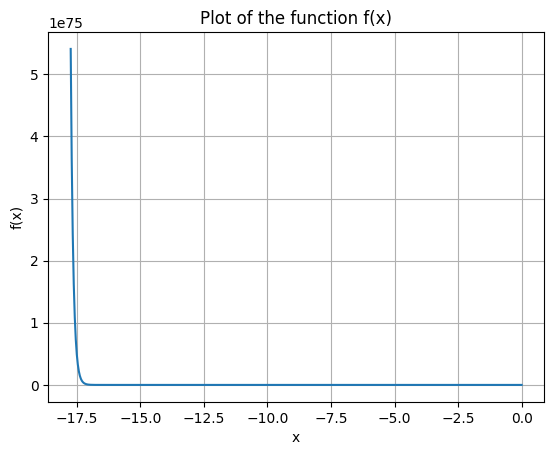

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constants
A = 0.05
x_min = -20
x_mid = -10
x_max = -4.34295 * 10**-7

# Define the function f(x)
def f(x):
    numerator = 1 - np.exp(-40 * x)
    denominator = 1 - np.exp(-30 * x)
    return A * (numerator / denominator)

# Integrate the function f(x) from x_mid to x_max
x_values = np.linspace(x_mid, x_max, 1000)
integral_second = np.trapz(f(x_values), x_values)

# Integrate the function f(x) from x_min to x_mid
integral_first = A * (x_mid - x_min)

# Calculate the total integral
total_integral = integral_first + integral_second

print("Total integral:", total_integral)

# Plot the function f(x)
x_values = np.linspace(x_min, x_max, 1000)
plt.plot(x_values, f(x_values))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function f(x)')
plt.grid(True)
plt.show()


<ipython-input-17-42c07ca6b4d2>:12: RuntimeWarning: overflow encountered in exp
  numerator = 1 - np.exp(-40 * x)


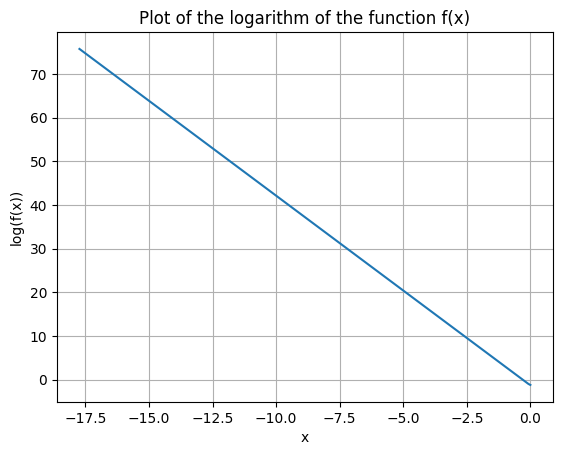

In [18]:
x_values = np.linspace(x_min, x_max, 1000)
plt.plot(x_values, np.log10(f(x_values)))
plt.xlabel('x')
plt.ylabel('log(f(x))')
plt.title('Plot of the logarithm of the function f(x)')
plt.grid(True)
plt.show()